In [3183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.stats as stat
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3184]:
df = pd.read_csv('processed_data.csv')

In [3185]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0             35   193.32  33.6   
1            1     85.0           66.0             29    60.82  26.6   
2            8    183.0           64.0             19   229.85  23.3   
3            1     89.0           66.0             23    94.00  28.1   
4            0    137.0           40.0             35   168.00  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     1.200   33        1

In [3186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               742 non-null    int64  
 1   Glucose                   742 non-null    float64
 2   BloodPressure             742 non-null    float64
 3   SkinThickness             742 non-null    int64  
 4   Insulin                   742 non-null    float64
 5   BMI                       742 non-null    float64
 6   DiabetesPedigreeFunction  742 non-null    float64
 7   Age                       742 non-null    int64  
 8   Outcome                   742 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 52.3 KB


In [3187]:
df.duplicated().sum()

0

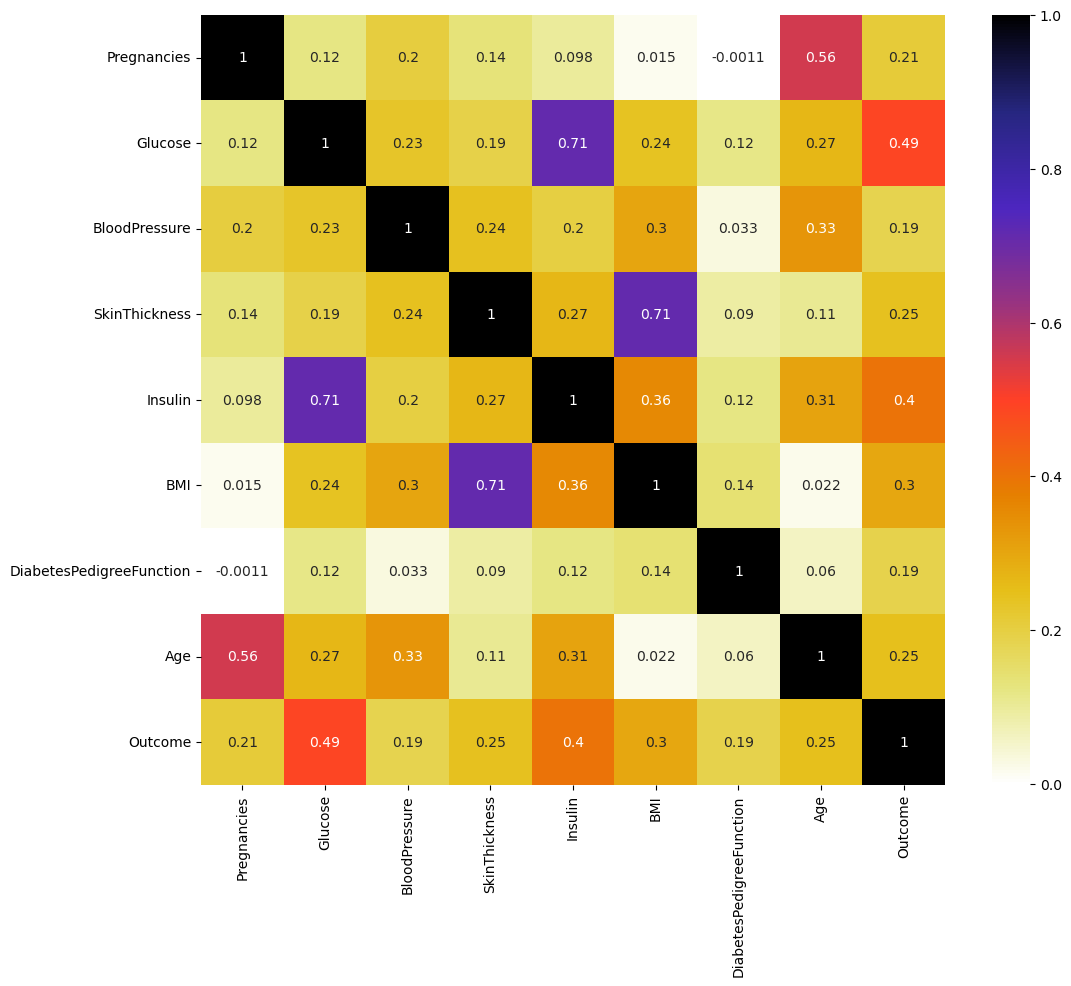

In [3188]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap=plt.cm.CMRmap_r)
plt.show()

In [3189]:
cols=['Glucose','BloodPressure','Insulin','BMI','SkinThickness','DiabetesPedigreeFunction','Age','Pregnancies','Outcome',]

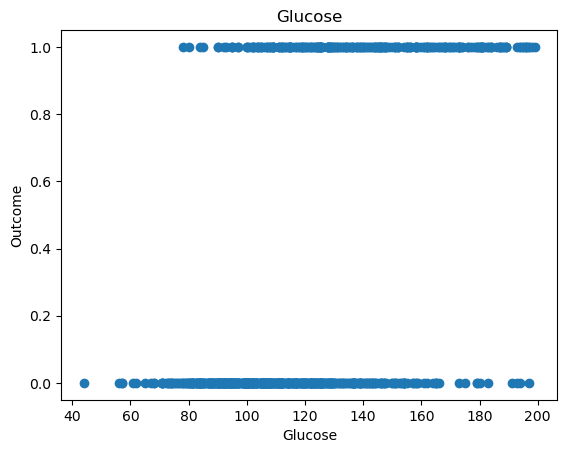

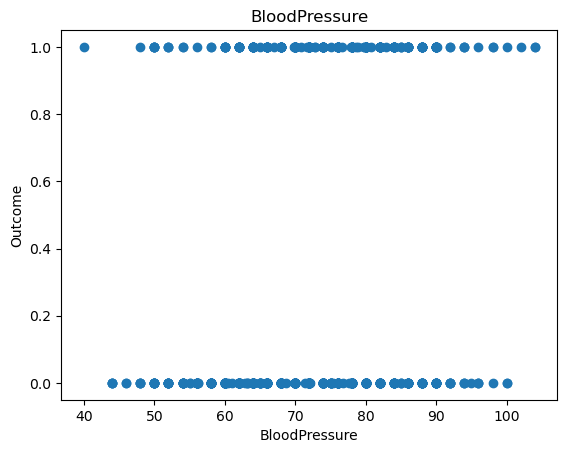

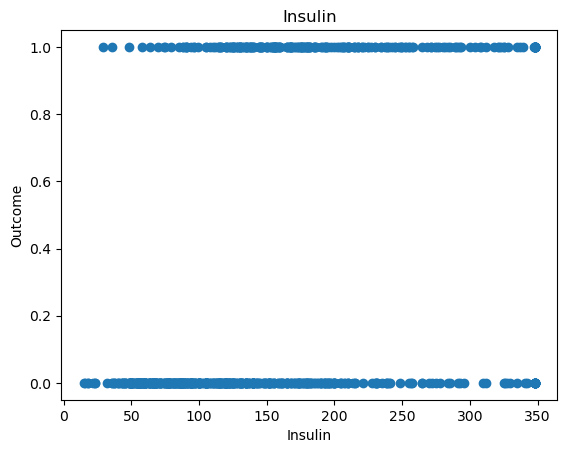

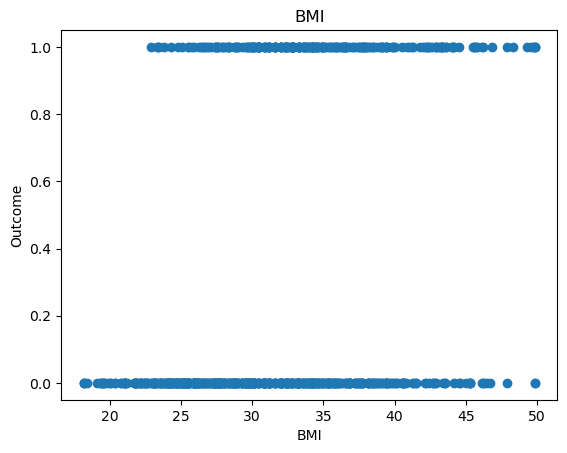

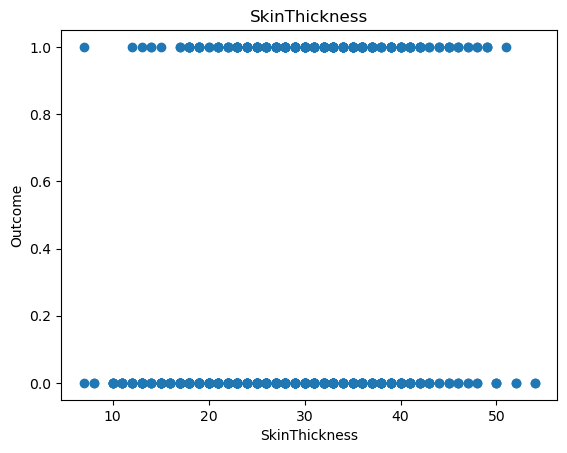

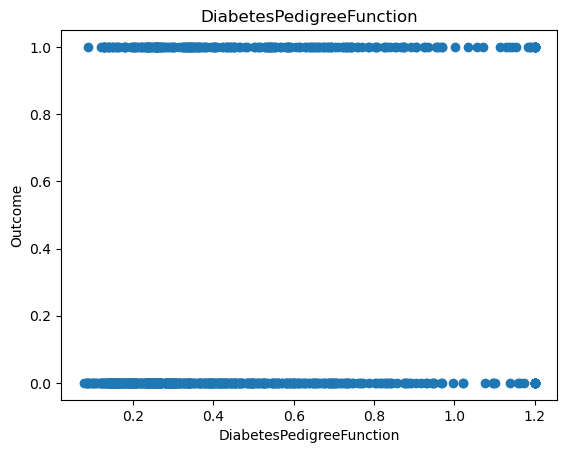

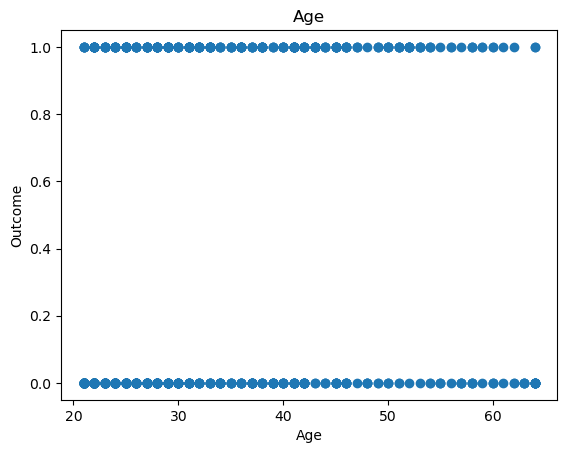

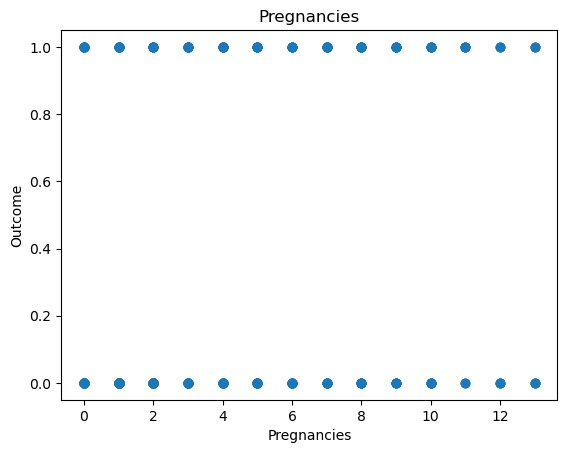

In [3190]:
for label in cols[:-1]:
    plt.scatter(df[label],df['Outcome'])
    plt.title(label)
    plt.ylabel('Outcome')
    plt.xlabel(label)
    plt.show()

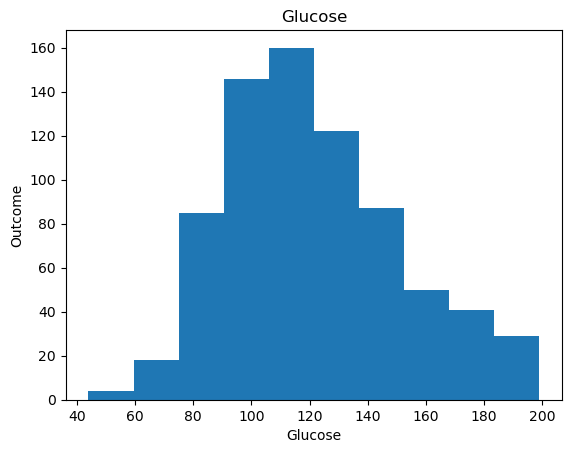

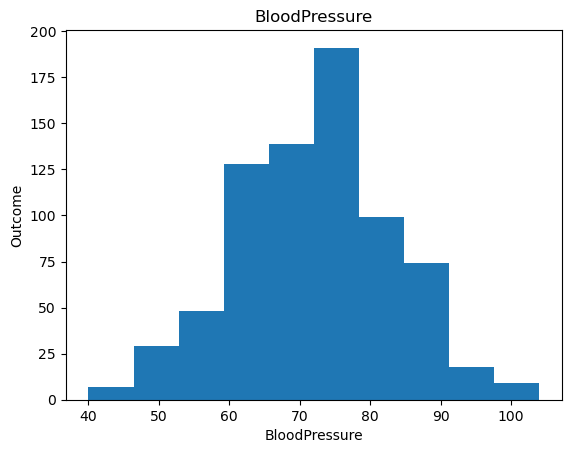

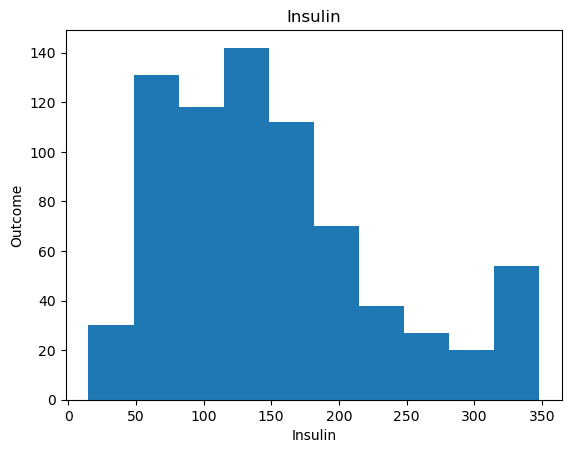

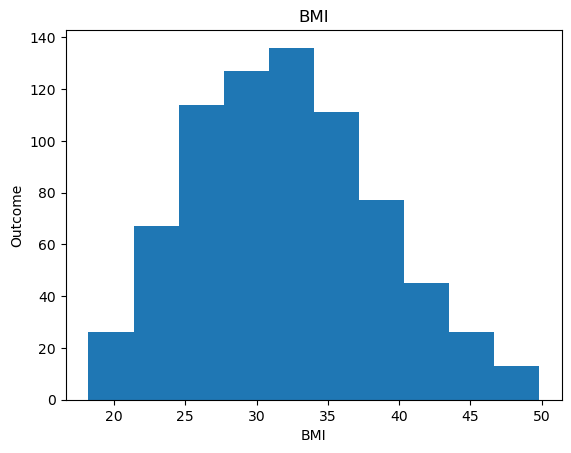

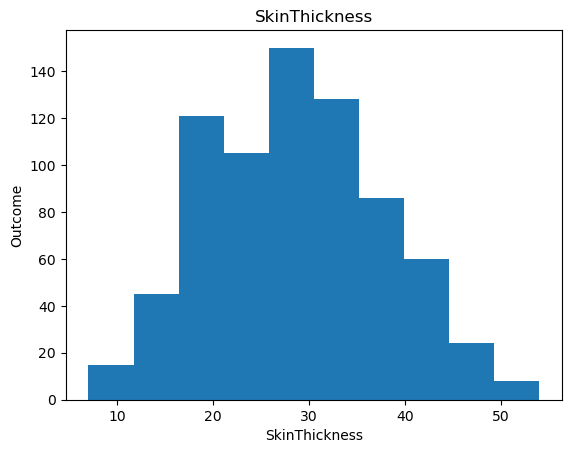

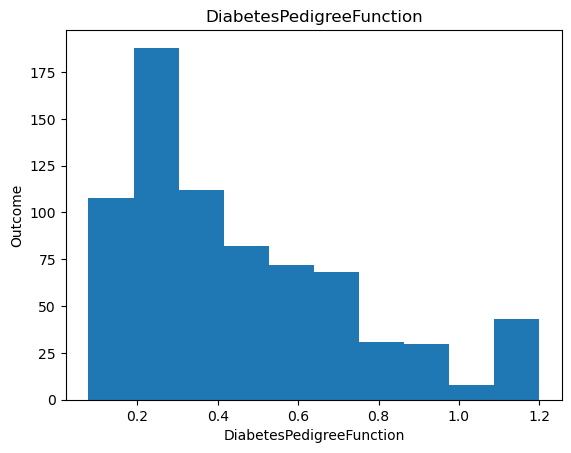

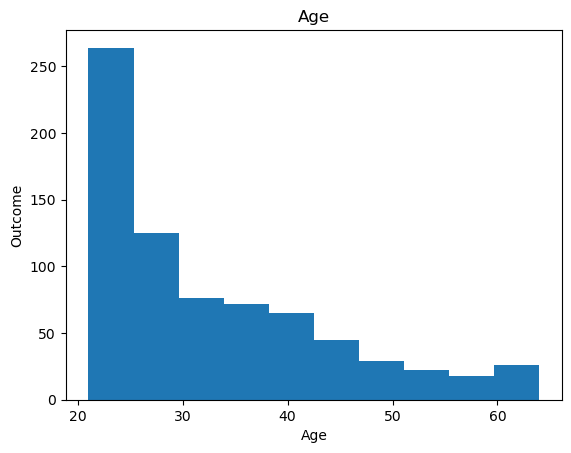

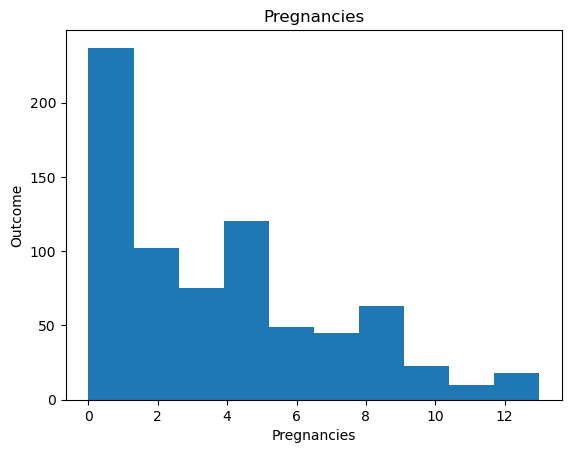

In [3191]:
for label in cols[:-1]:
    plt.hist(df[label])
    plt.title(label)
    plt.ylabel('Outcome')
    plt.xlabel(label)
    plt.show()

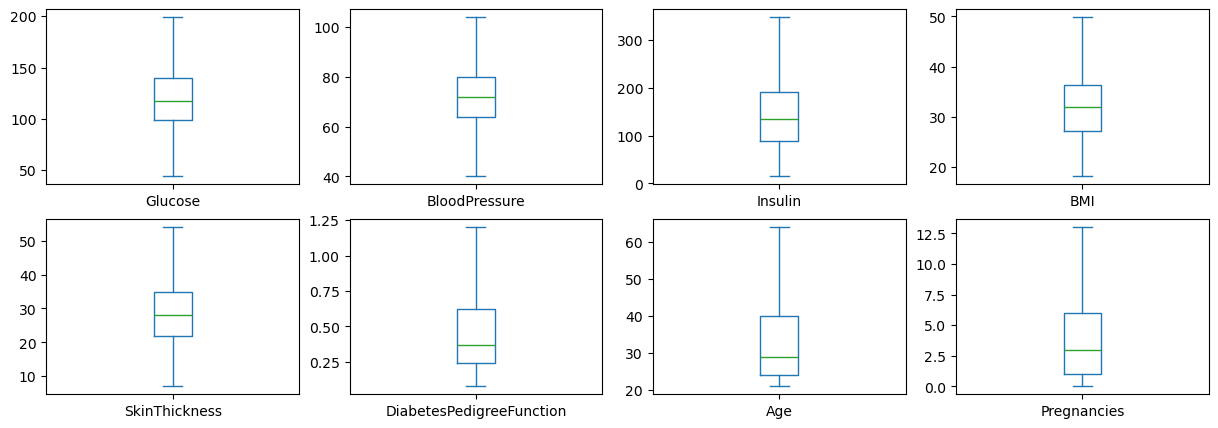

In [3192]:
for i in range(1,9):
    plt.subplot(2, 4, i)
    df[cols[i-1]].plot.box(figsize=(15,5))

In [3193]:
def clean_outlier_re(col,outlier,df,value ):
    for i in outlier :
        ind =df.index[df[col]==i].tolist()
        for j in ind :
            df.loc[j, col] = value
    return df

In [3194]:
def clean_outlier_drop(col,outlier,df ):
    for i in outlier :
        ind =df.index[df[col]==i].tolist()
        df=df.drop(index=ind,axis=0)
    return df

In [3195]:
def find_outlier(cols,data):#outlier 
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers_list = data[(data[cols] < lower_bound) | (data[cols] > upper_bound)][cols].unique().tolist()
    return outliers_list,lower_bound,upper_bound


In [3196]:
for i in cols[:-1]:
    outlier,l,u = find_outlier(i,df)
    print(i," :",outlier)  

Glucose  : []
BloodPressure  : []
Insulin  : []
BMI  : []
SkinThickness  : []
DiabetesPedigreeFunction  : []
Age  : []
Pregnancies  : []


In [3197]:
df.shape

(742, 9)

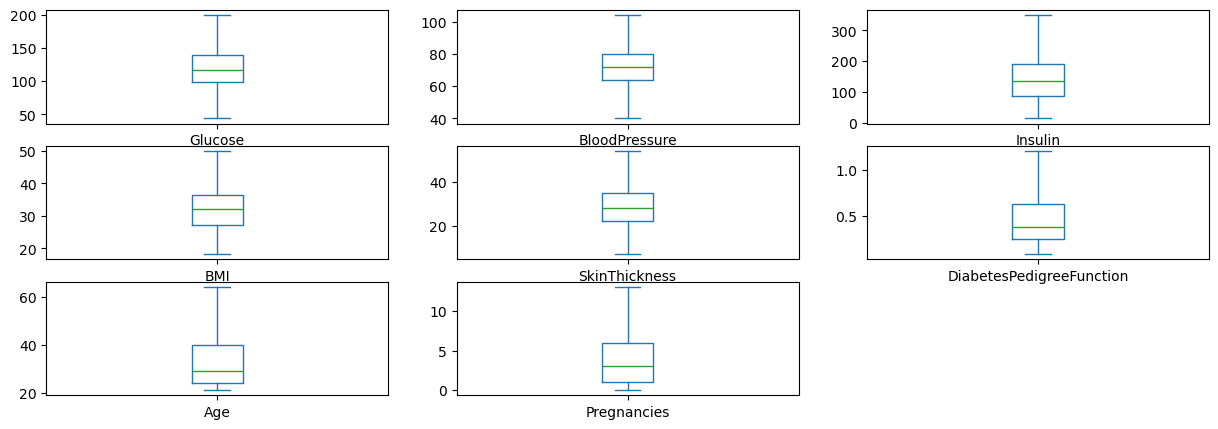

In [3198]:
for i in range(1,9):
    plt.subplot(3, 3, i)
    df[cols[i-1]].plot.box(figsize=(15,5))

In [3199]:
def plot_data(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title('Histogram of '+feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title('Probability Plot of '+feature)
    plt.show()


In [3200]:
data = df.copy()

In [3201]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0             35   193.32  33.6   
1            1     85.0           66.0             29    60.82  26.6   
2            8    183.0           64.0             19   229.85  23.3   
3            1     89.0           66.0             23    94.00  28.1   
4            0    137.0           40.0             35   168.00  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     1.200   33        1

In [3202]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [3203]:
def scale(df,oversample=False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)
    if oversample:
        
        # ros = TomekLinks()
        # ros = ADASYN()
        # ros = RandomOverSampler(random_state=41)
        # x, y = ros.fit_resample(x, y)
        ros=SMOTEENN(random_state=41)
        # ros=SMOTE()
        x, y = ros.fit_resample(x,y)
    #data = np.hstack([x,np.reshape(y,(-1,1))])
    return x, y

In [3204]:
reduced_features = ['BloodPressure', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness']  # Keep these
df = df.drop(columns=reduced_features, axis=1)

In [3205]:
df['Outcome'].value_counts()

Outcome
0    489
1    253
Name: count, dtype: int64

In [3206]:
df.shape

(742, 5)

In [3207]:
df.isnull().sum()

Pregnancies    0
Glucose        0
BMI            0
Age            0
Outcome        0
dtype: int64

In [3208]:
df.head()

Pregnancies  Glucose   BMI  Age  Outcome
0            6    148.0  33.6   50        1
1            1     85.0  26.6   31        0
2            8    183.0  23.3   32        1
3            1     89.0  28.1   21        0
4            0    137.0  43.1   33        1

### Split Data ###

In [3209]:
train,test = train_test_split(df,test_size=0.20)
dtrain,dtest = train_test_split(data,test_size=0.15)

In [3210]:
train['Outcome'].value_counts()

Outcome
0    393
1    200
Name: count, dtype: int64

In [3211]:
xtrain, ytrain = scale(dtrain, True)
xtest, ytest = scale(dtest, False)

In [3212]:
x_train,y_train = scale(train,True)
x_test,y_test = scale(test,False)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_21496\2043925642.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=y_train_df, palette='pastel')


<Axes: xlabel='Outcome', ylabel='count'>

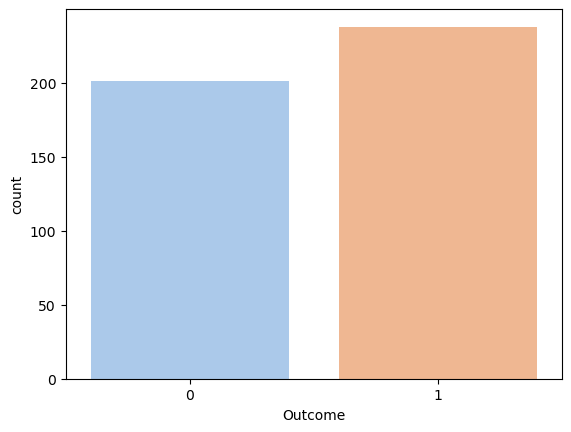

In [3213]:
# Convert y_train to a DataFrame
y_train_df = pd.DataFrame(y_train, columns=['Outcome'])
sns.countplot(x='Outcome', data=y_train_df, palette='pastel')

# Deep learning

In [3214]:
def plot_history(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3215]:
dl_model = Sequential() 
dl_model.add(Dense(256,  activation = 'relu' ,input_shape=([8]))) #input layer
dl_model.add(Dense(256,  activation = 'relu'))
dl_model.add(Dense(1,activation = 'sigmoid'))
dl_model.summary()
dl_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' ,metrics = ['accuracy','Precision','Recall','AUC'])

c:\Users\ASUS TUF\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_183 (Dense)               │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_184 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_185 (Dense)               │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,353 (267.00 KB)

 Trainable params: 68,353 (267.00 KB)

 Non-trainable params: 0 (0.00 B)

In [3216]:
# num_epochs = 10
# history = dl_model.fit(xtrain,
#                     ytrain,
#                     epochs=num_epochs,
#                     steps_per_epoch=200,
#                     validation_data=(xtest, ytest),
#                     verbose=0)

In [3217]:
# dl_model.evaluate(xtest,ytest)

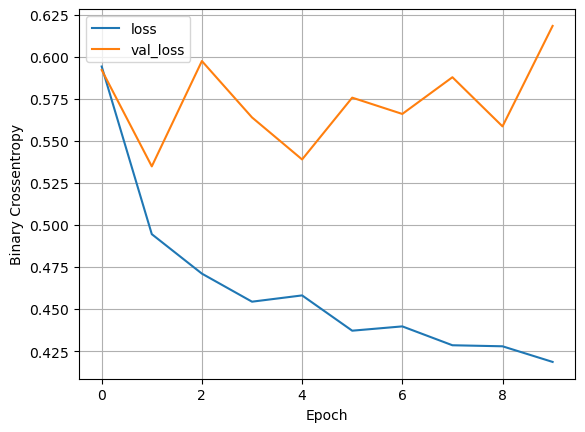

In [3218]:
plot_history(history)

# Build Model

### Logistic Regression ###

In [3219]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [3220]:
y_pre = lg_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        96
           1       0.57      0.74      0.64        53

    accuracy                           0.70       149
   macro avg       0.70      0.71      0.69       149
weighted avg       0.73      0.70      0.71       149



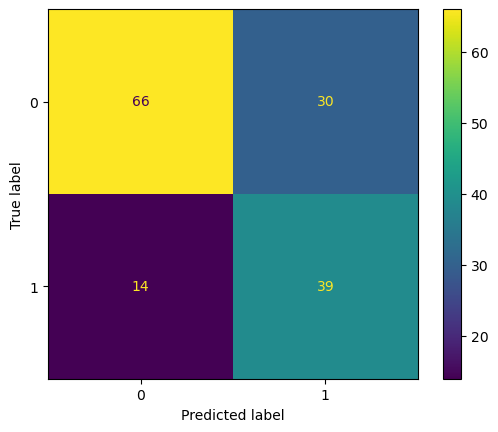

In [3221]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### Supporting Vector Machine ###

In [3222]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [3223]:
y_pre = svm_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82        96
           1       0.65      0.81      0.72        53

    accuracy                           0.78       149
   macro avg       0.77      0.79      0.77       149
weighted avg       0.80      0.78      0.78       149



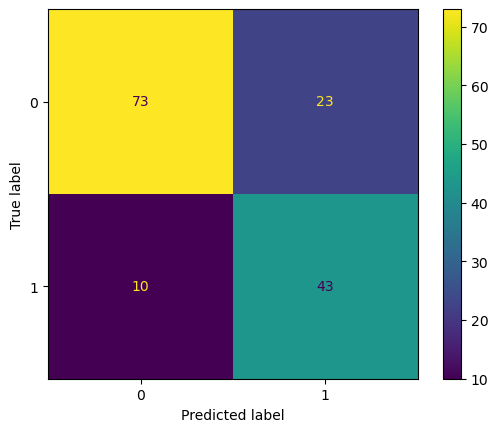

In [3224]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### Gaussian Naive Bays ###

In [3225]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [3226]:
y_pre = nb_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74        96
           1       0.55      0.74      0.63        53

    accuracy                           0.69       149
   macro avg       0.68      0.70      0.68       149
weighted avg       0.72      0.69      0.70       149



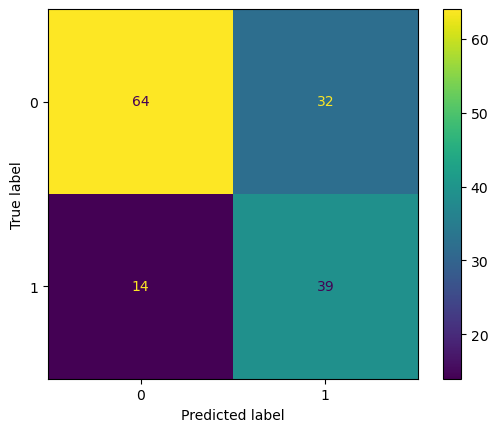

In [3227]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### **Tuning for GaussianNB**

In [3228]:
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # The regularization term (for smoothing the variance)
    
}

nb_model = GaussianNB()
grid_search = GridSearchCV(estimator = nb_model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
# Fit the model
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'var_smoothing': 1e-09}

In [3229]:
y_pre = grid_search.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74        96
           1       0.55      0.74      0.63        53

    accuracy                           0.69       149
   macro avg       0.68      0.70      0.68       149
weighted avg       0.72      0.69      0.70       149



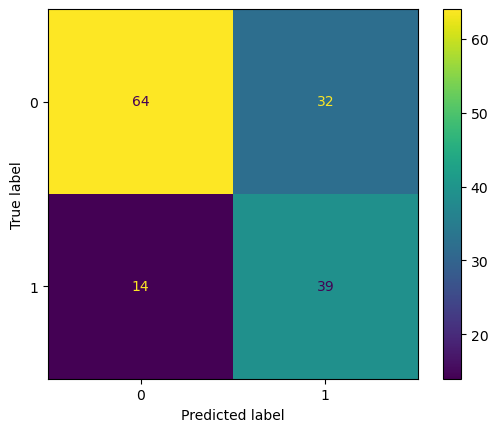

In [3230]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### Random Forest ###

In [3231]:
rf_model = RandomForestClassifier(criterion='gini',
                                  max_depth=8,
                                  min_samples_split=10)
rf_model.fit(x_train, y_train)
y_pre = grid_search.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74        96
           1       0.55      0.74      0.63        53

    accuracy                           0.69       149
   macro avg       0.68      0.70      0.68       149
weighted avg       0.72      0.69      0.70       149



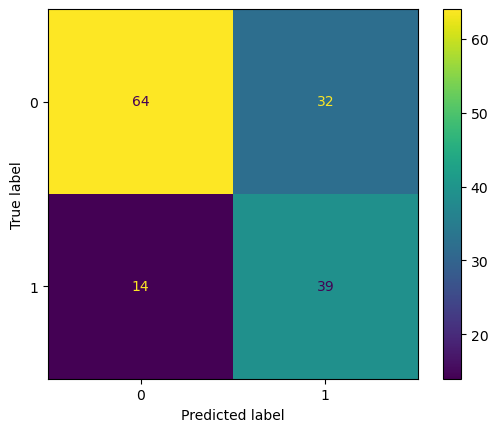

In [3232]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()